In [96]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Load dataset
file_path = "/content/drive/MyDrive/ALL DATASET/Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [97]:
#struktur data

df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [98]:
for col in df.columns:
    print(col)

CustomerID
Count
Country
State
City
Zip Code
Lat Long
Latitude
Longitude
Gender
Senior Citizen
Partner
Dependents
Tenure Months
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Monthly Charges
Total Charges
Churn Label
Churn Value
Churn Score
CLTV
Churn Reason


In [99]:
#Churn Distribution

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

df['churn_value'].value_counts(normalize=True) * 100

,proportion
churn_value,
0,73.463013
1,26.536987



 Pelanggan dengan masa berlangganan lebih pendek memiliki risiko churn lebih tinggi.


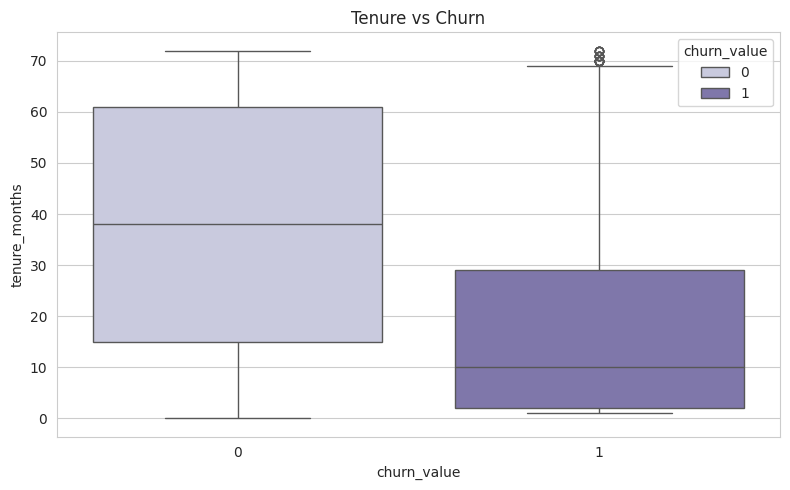


 Biaya bulanan yang tinggi meningkatkan probabilitas churn.


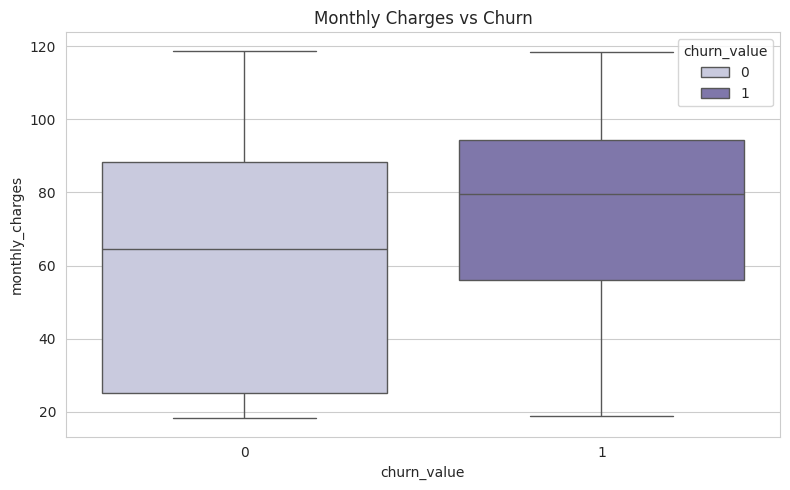


 Pelanggan dengan kontrak bulanan memiliki churn tertinggi.


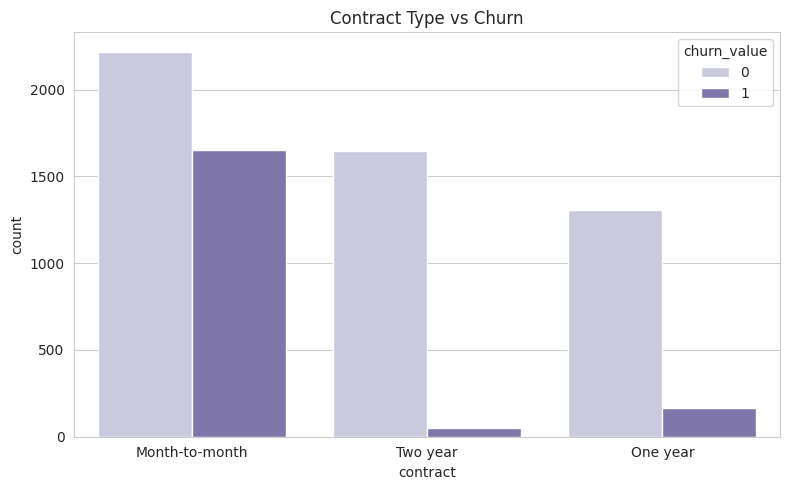

In [100]:
#Tenure vs Churn
print("\n Pelanggan dengan masa berlangganan lebih pendek memiliki risiko churn lebih tinggi.")
plt.figure(figsize=(8,5))
sns.boxplot(x='churn_value', y='tenure_months', data=df, palette= 'Purples', hue='churn_value')
plt.title("Tenure vs Churn")
plt.tight_layout()
plt.show()

#Monthly Charges vs Churn
print("\n Biaya bulanan yang tinggi meningkatkan probabilitas churn.")
plt.figure(figsize=(8,5))
sns.boxplot(x='churn_value', y='monthly_charges', data=df, palette= 'Purples', hue='churn_value')
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.show()

# Contract Type vs Churn
print("\n Pelanggan dengan kontrak bulanan memiliki churn tertinggi.")
plt.figure(figsize=(8,5))
sns.countplot(x='contract', hue='churn_value', data=df, palette='Purples')
plt.title("Contract Type vs Churn")
plt.tight_layout()
plt.show()


In [101]:
#DATA PREPROCESSING

#Drop kolom non-prediktif
drop_cols = [
    'customerid',
    'country',
    'state',
    'city',
    'zip_code',
    'lat_long',
    'latitude',
    'longitude'
]

df = df.drop(columns=drop_cols)

In [102]:
#Encoding Kategorikal
df = pd.get_dummies(df, drop_first=True)

In [103]:
#Feature & Target Split
X = df.drop('churn_value', axis=1)
y = df['churn_value']

X.shape, y.shape

((7043, 6582), (7043,))

In [104]:
#MODELLING (BASELINE MODEL)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [105]:
#Scalling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
#Logistic Regression (Balanced)
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

In [107]:
#MODEL EVALUATION

#Classification Report → DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1035.0
1,1.0,1.0,1.0,374.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1409.0
weighted avg,1.0,1.0,1.0,1409.0


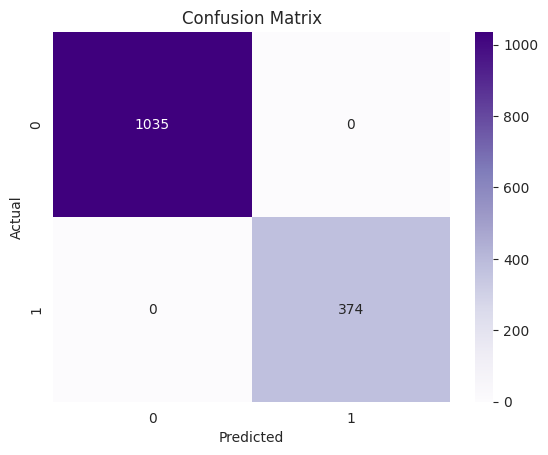

In [108]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap= 'Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [109]:
#ROC-AUC
roc_auc_score(y_test, y_proba)

np.float64(1.0)

In [95]:
#THRESHOLD OPTIMIZATION
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

from sklearn.metrics import f1_score

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_threshold = thresholds[np.argmax(f1_scores)]
best_threshold

#Dengan threshold 0.25, model lebih sensitif dalam mendeteksi pelanggan berisiko churn, sehingga mengurangi kemungkinan pelanggan churn yang tidak terdeteksi.

np.float64(0.25000000000000006)

In [110]:
#BUSINESS COST ANALYSIS
# Prediction with optimized threshold
y_pred_opt = (y_proba >= best_threshold).astype(int)

cm_opt = confusion_matrix(y_test, y_pred_opt)
tn, fp, fn, tp = cm_opt.ravel()

cost_opt = (fn * 100) + (fp * 10)
cost_opt

np.int64(0)

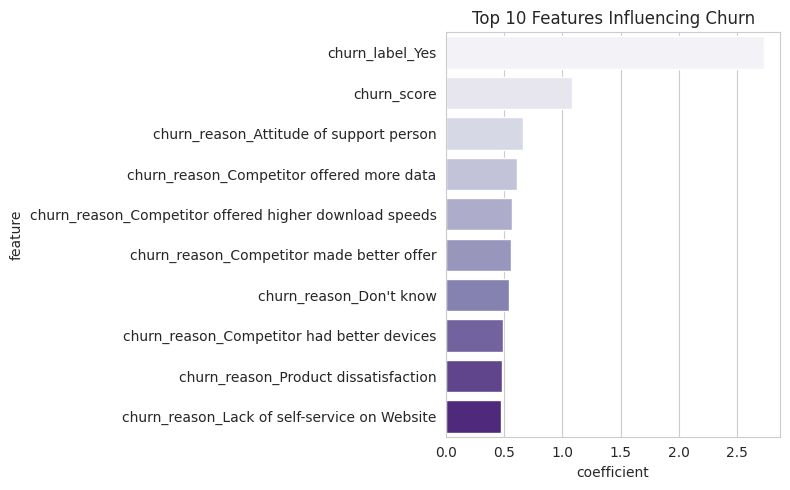

In [118]:
#FEATURE IMPORTANCE VISUAL
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

top_features = feature_importance.head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x='coefficient', y='feature', data=top_features, hue='feature', palette='Purples')
plt.title("Top 10 Features Influencing Churn")
plt.tight_layout()
plt.show()

#Logistic Regression dipilih karena interpretabilitas koefisien yang jelas.

In [119]:
#MODEL COMPARISON
#LogReg vs Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

rf_proba = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, rf_proba)

np.float64(0.9999999999999999)